# Desafio de análise
Obs: só consegui baixar os primeiros 100mb da base. 
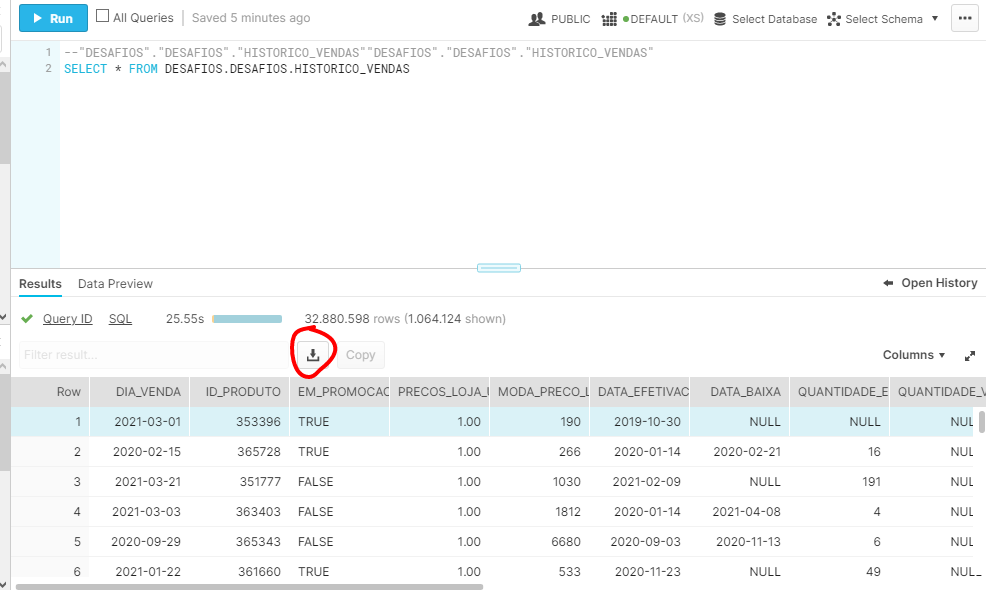

Caso precisem da base exata que eu usei, basta solicitar. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def load_data(fname: str):
    df = pd.read_csv(fname)
    df["DIA_VENDA"] = pd.to_datetime(df["DIA_VENDA"])
    df["DATA_EFETIVACAO"] = pd.to_datetime(df["DATA_EFETIVACAO"])
    df["DATA_BAIXA"] = pd.to_datetime(df["DATA_BAIXA"])
    # Considerando como 0 os dados indicados na descrição do problema:
    df["QUANTIDADE_ESTOQUE"] = df["QUANTIDADE_ESTOQUE"].fillna(0)
    df["QUANTIDADE_VENDIDA"] = df["QUANTIDADE_VENDIDA"].fillna(0)
    df["RECEITA_LIQUIDA"] = df["RECEITA_LIQUIDA"].fillna(0)
    return df

vendas = load_data("result.csv")
vendas.head()

,DIA_VENDA,ID_PRODUTO,EM_PROMOCAO,PRECOS_LOJA_UNICOS,MODA_PRECO_LOJA,DATA_EFETIVACAO,DATA_BAIXA,QUANTIDADE_ESTOQUE,QUANTIDADE_VENDIDA,RECEITA_LIQUIDA,DIVISAO_PRODUTO,GRUPO_PRODUTO,FAMILIA_PRODUTO,LINHA_PRODUTO,ID_FILIAL_VENDA,ESTADO_VENDA,REGIAO_VENDA,TIPO_FILIAL,UNIQUE_KEY
0,2021-03-01,353396,True,1.0,190.0,2019-10-30,NaT,0.0,0.0,0.0,2,7,9,15672,28,PE,NORDESTE,Loja,2021-03-0128353396
1,2020-02-15,365728,True,1.0,266.0,2020-01-14,2020-02-21,16.0,0.0,0.0,2,6,35,10366,36,RJ,RIO DE JANEIRO,Loja,2020-02-1536365728
2,2021-03-21,351777,False,1.0,1030.0,2021-02-09,NaT,191.0,0.0,0.0,2,4,21,13449,2,DF,CENTRO OESTE,Loja,2021-03-212351777
3,2021-03-03,363403,False,1.0,1812.0,2020-01-14,2021-04-08,4.0,0.0,0.0,2,11,9,16609,76,PI,NORDESTE,Loja,2021-03-0376363403
4,2020-09-29,365343,False,1.0,6680.0,2020-09-03,2020-11-13,6.0,0.0,0.0,1,23,5,13629,77,SP,SAO PAULO CAPITAL,Loja,2020-09-2977365343


# Conhecendo os dados

In [50]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537873 entries, 0 to 537872
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_VENDA           537873 non-null  datetime64[ns]
 1   ID_PRODUTO          537873 non-null  int64         
 2   EM_PROMOCAO         537873 non-null  bool          
 3   PRECOS_LOJA_UNICOS  537873 non-null  float64       
 4   MODA_PRECO_LOJA     477145 non-null  float64       
 5   DATA_EFETIVACAO     477145 non-null  datetime64[ns]
 6   DATA_BAIXA          220511 non-null  datetime64[ns]
 7   QUANTIDADE_ESTOQUE  537873 non-null  float64       
 8   QUANTIDADE_VENDIDA  537873 non-null  float64       
 9   RECEITA_LIQUIDA     537873 non-null  float64       
 10  DIVISAO_PRODUTO     537873 non-null  int64         
 11  GRUPO_PRODUTO       537873 non-null  int64         
 12  FAMILIA_PRODUTO     537873 non-null  int64         
 13  LINHA_PRODUTO       537873 no

In [51]:
vendas.QUANTIDADE_ESTOQUE = vendas.QUANTIDADE_ESTOQUE.fillna(0)
vendas.head()

,DIA_VENDA,ID_PRODUTO,EM_PROMOCAO,PRECOS_LOJA_UNICOS,MODA_PRECO_LOJA,DATA_EFETIVACAO,DATA_BAIXA,QUANTIDADE_ESTOQUE,QUANTIDADE_VENDIDA,RECEITA_LIQUIDA,DIVISAO_PRODUTO,GRUPO_PRODUTO,FAMILIA_PRODUTO,LINHA_PRODUTO,ID_FILIAL_VENDA,ESTADO_VENDA,REGIAO_VENDA,TIPO_FILIAL,UNIQUE_KEY
0,2021-03-01,353396,True,1.0,190.0,2019-10-30,NaT,0.0,0.0,0.0,2,7,9,15672,28,PE,NORDESTE,Loja,2021-03-0128353396
1,2020-02-15,365728,True,1.0,266.0,2020-01-14,2020-02-21,16.0,0.0,0.0,2,6,35,10366,36,RJ,RIO DE JANEIRO,Loja,2020-02-1536365728
2,2021-03-21,351777,False,1.0,1030.0,2021-02-09,NaT,191.0,0.0,0.0,2,4,21,13449,2,DF,CENTRO OESTE,Loja,2021-03-212351777
3,2021-03-03,363403,False,1.0,1812.0,2020-01-14,2021-04-08,4.0,0.0,0.0,2,11,9,16609,76,PI,NORDESTE,Loja,2021-03-0376363403
4,2020-09-29,365343,False,1.0,6680.0,2020-09-03,2020-11-13,6.0,0.0,0.0,1,23,5,13629,77,SP,SAO PAULO CAPITAL,Loja,2020-09-2977365343


In [52]:
print(vendas.shape)
vendas.nunique()

(537873, 19)


DIA_VENDA                500
ID_PRODUTO              1045
EM_PROMOCAO                2
PRECOS_LOJA_UNICOS         4
MODA_PRECO_LOJA          521
DATA_EFETIVACAO          608
DATA_BAIXA               405
QUANTIDADE_ESTOQUE      3148
QUANTIDADE_VENDIDA        32
RECEITA_LIQUIDA          872
DIVISAO_PRODUTO            6
GRUPO_PRODUTO             30
FAMILIA_PRODUTO           66
LINHA_PRODUTO            805
ID_FILIAL_VENDA           61
ESTADO_VENDA              21
REGIAO_VENDA               8
TIPO_FILIAL                1
UNIQUE_KEY            537873
dtype: int64

Neste subset do dataset disponibilizado, temos 537873 observações em 500 lojas e 1045 produtos. 


Pelo que entendi, remarcação de preço é o nome que se dá sempre que o preço muda. 

Vamos analisar se o preço mudando, há uma diferença significativa no receita. 

In [53]:
vendas["PRECOS_LOJA_UNICOS"].unique()

array([1., 0., 2., 3.])

Vamos usar teste de hipótese para verificar se há diferença na receita líquida por conta da política de remarcação. 

- Hipótese nula: "A política de remarcação de preços não impacta a receita".  
- Hipótese alternativa: "A política de remarcação de preços está impactando a receita".


In [56]:
vendas_precos_unicos = vendas[["PRECOS_LOJA_UNICOS", "RECEITA_LIQUIDA"]]
vendas_precos_unicos.tail()

,PRECOS_LOJA_UNICOS,RECEITA_LIQUIDA
537868,1.0,0.0
537869,1.0,0.0
537870,1.0,0.0
537871,1.0,0.0
537872,1.0,0.0


In [71]:
prices_0 = vendas_precos_unicos[vendas_precos_unicos['PRECOS_LOJA_UNICOS']==0.0]['RECEITA_LIQUIDA'].values.tolist()
prices_1 = vendas_precos_unicos[vendas_precos_unicos['PRECOS_LOJA_UNICOS']==1.0]['RECEITA_LIQUIDA'].values.tolist()
prices_2 = vendas_precos_unicos[vendas_precos_unicos['PRECOS_LOJA_UNICOS']==2.0]['RECEITA_LIQUIDA'].values.tolist()
prices_3 = vendas_precos_unicos[vendas_precos_unicos['PRECOS_LOJA_UNICOS']==3.0]['RECEITA_LIQUIDA'].values.tolist()


In [73]:
from scipy.stats import f_oneway
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [78]:
stat, p = f_oneway(prices_0, prices_1, prices_2, prices_3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p <= 0.05:
	print('A diferença entre as políticas de remarcação são estatisticamente significantes.')
else:
	print('A diferença entre as políticas de remarcação não são estatisticamente significantes.')

stat=45.678, p=0.000
A diferença entre as políticas de remarcação são estatisticamente significantes.


Portanto, respondendo à questão:
"É possível excluir a possibilidade de que a política de remarcações de preços esteja diminuindo a receita?".  
R: Não, não é possível excluir essa possibilidade. Na verdade, existem indícios de que essa hipótese é verdadeira.